# ◽️ Pytorch Tutorial

---
## `torch.Tensors`
* Tensorflow의 Tensor와 다르지 않다.
  * Numpy의 ndarrays를 기본적으로 활용하고 있다.
  * Numpy의 ndarrays의 대부분의 operation을 사용할 수 있도록 구성되어 있다.
* Numpy의 operation은 CPU만을 이용해 느리지만 Tensor는 CUDA를 활용해 GPU를 이용하기 때문에 빠르게 연산을 진행할 수 있다.


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.cuda.get_device_name(0)

'GeForce GTX 1080 Ti'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.__version__

'1.7.1'

In [18]:
#img [batch, channel, h, w] pytorch

# Construct a 1x3x5x5 matrix, uninitialized
x = torch.Tensor(1,3,5,5)
print(x.shape)

# Construct a randomly initialized 1x3x5x5 matrix 
x = torch.rand(1,3,5,5)
print(x.shape)

# Construct a matrix with the list, [[3, 4, 5], [1, 2, 3]]
x = torch.Tensor([[3, 4, 5], [1, 2, 3]])
print(x.shape)

# print the size of the last matrix

print(x.size())

torch.Size([1, 3, 5, 5])
torch.Size([1, 3, 5, 5])
torch.Size([2, 3])
torch.Size([2, 3])


#### ✔️ dtype and device 
 * dtype - Tensor의 데이터 타입
 * device - Tensor의 작업 위치 (cpu or cuda)

In [6]:
x = torch.tensor([[3, 4, 5], [1, 2, 3]])

In [30]:
## type cast the tensor 'x' to 'double or float64'
## Todo
x_ = x.double()
x_ = x.type(torch.double)
x_ = x.to(torch.double) # to : GPU로 값을 보내줌
##
print(x_)

tensor([[3., 4., 5.],
        [1., 2., 3.]], dtype=torch.float64)


In [7]:
## set the device of the tensor 'x' to gpu
## TODO
# (shall) > CUDA_VISIBLE_DEVICES=0 python main.py    : 0번 GPU만 쓰도록
# (shall) > CUDA_VISIBLE_DEVICES=0,1 python main.py  : 0,1번 GPU 쓰도록
# import os
# os.env['CUDA_VISIBLE'] = 0

# cuda란? GPU 프로그래밍을 하기위한 API
device = torch.device('cuda')
##
x = x.to(device) # CPU -> GPU
print(x.device)

cuda:0


In [33]:
device_0 = torch.device('cuda:0')
device_1 = torch.device('cuda:1')

x = torch.randn(4, 3, dtype=torch.float64)
y = torch.randn(4, 3, dtype=torch.float32)
z = torch.randint(0, 10, (4, 3), dtype=torch.int32)

print('Before "to" method')

print(x.dtype, x.device)
print(y.dtype, y.device)
print(z.dtype, z.device, '\n')

print('After "to" method')
# to method with specific dtype and device 
z = z.to(device_1)
x = x.to(dtype=torch.int32, device=device_0)

# to method with some tensor 
y = y.to(z)
z = z.to(device="cpu")

print(x.dtype, x.device)
print(y.dtype, y.device)
print(z.dtype, z.device, '\n')

Before "to" method
torch.float64 cpu
torch.float32 cpu
torch.int32 cpu 

After "to" method
torch.int32 cuda:0
torch.int32 cuda:1
torch.int32 cpu 



#### ✔️ Numpy-like tensor construction functions in PyTorch

In [14]:
x = torch.empty(3, 5)
print('1:',x, '\n')

x = torch.zeros(3, 5)
print('2:',x, '\n')

x = torch.ones(3, 5)
print('3:',x, '\n')

x = torch.full((3, 5), 3.1415)
print('4:',x, '\n')

x = torch.arange(0, 5, 2)
print('5:',x, '\n')

y = torch.linspace(0, 5, 9)
print('6:',y, '\n')

z = torch.logspace(-10, 10, 5)
print('7:',z, '\n')

z = torch.eye(5)
print('8:',z, '\n')

# Construct a 3 x 5 matrix with random value from uniform distribution, i.e. Uniform[0, 1)
x = torch.rand(3, 5)

# Construct a 3 x 5 matrix with random value from normal distribution, i.e. Normal(0, 1)
x = torch.randn(3, 5)

x = torch.randint(3, 10, (3, 5))
print('9:',x, '\n')

1: tensor([[5.0847e+25, 4.5567e-41, 5.0847e+25, 4.5567e-41, 4.4842e-44],
        [0.0000e+00, 1.5695e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.9683e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]) 

2: tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

3: tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

4: tensor([[3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415]]) 

5: tensor([0, 2, 4]) 

6: tensor([0.0000, 0.6250, 1.2500, 1.8750, 2.5000, 3.1250, 3.7500, 4.3750, 5.0000]) 

7: tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10]) 

8: tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

9: tensor([[7, 7, 3, 8, 9],
        [4, 3, 3, 9, 8],
        [6, 7, 9, 5, 4]]) 



#### ✔️ `torch.*_like` and `torch.Tensor.new_*` methods
 * `*_like`: Tensor를 input으로 받아, Tensor 모양, type과 device를 가지는 matrix를 return.
     * e.g. zeros_like, ones_like
 * `new_*`: Shape를 input으로 받아, Tensor와 같은 type과 device를 가지는 matrix를 return

In [35]:
x = torch.rand(1, 3, 5, 5).type(torch.cuda.DoubleTensor)

## TODO
# construct zero-initialized tensor that has the shape of tensor 'x'
y = torch.zeros_like(x) # zeros_like : y를 GPU로 바로 만들 수 있음
print(y.size(), y.device)

# Make zero-initialized 2x3 matrix with attributes of tensor 'x'
y = x.new_zeros(2, 3)
print(y.size(), y.device)
##

torch.Size([1, 3, 5, 5]) cuda:0
torch.Size([2, 3]) cuda:0


#### ✔️ Conversion between numpy and torch.Tensor

In [45]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(b.device) # cpu
c = b.numpy() # numpy는 cpu에서만 정의할 수 있음

print('\n', a, '\n', b, '\n', c)


## TODO
# convert gpu tensor 'b' into numpy tensor 'c'
b = b.to('cuda:0')
print(b.device) # gpu
c = b.cpu().numpy()
# c = b.to('cpu').numpy()

## 
print('\n', a, '\n', b, '\n', c)

cpu

 [1. 1. 1. 1. 1.] 
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64) 
 [1. 1. 1. 1. 1.]
cuda:0

 [1. 1. 1. 1. 1.] 
 tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64) 
 [1. 1. 1. 1. 1.]


#### ✔️ Operations
* Operations에도 여러가지 syntax가 있다.

In [49]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

## TODO: add tensors x and y using the specified method
# +
z1 = x + y
# torch.add()
z2 = torch.add(x,y)
# torch.Tensor.add_()
y.add_(x)
# y+=x
##

print(torch.any((z1!=z2) != (z2!=y))) # false if all tensors are the same

tensor(False)


#### ✔️ Useful tensor methods
- `torch.Tensor.view()`, `torch.Tensor.reshape()`, `torch.Tensor.permute()`

In [23]:
x = torch.tensor([[1, 2],
                  [3, 4]])   # 2x2 tensor
y = torch.tensor([[[1, 3],
                   [2, 4]]]) # 1x2x2 tensor 
print(y.size())

## TODO: make (x-y_new).sum()=0 by changing y with view()[or reshape()] and permute()
y_new = y.view(2,2)
#y_new = y.reshape(2,2) 결과 같음
#y_new = y.squeeze() 결과 같음

y_new = y_new.permute(1,0) # 0번째와 1번째 차원의 순서바꿈
# shape : b X c X h X w
# shape : b X c X w X h
# y_new.permute(0, 1, 3, 2) 위치를 바꿔줌

print(x-y_new)
print((x-y_new).sum())

##

torch.Size([1, 2, 2])
tensor([[0, 0],
        [0, 0]])
tensor(0)


- `torch.Tensor.unsqueeze()`, `torch.Tensor.squeeze()`

In [29]:
# 100x700x28
x = torch.arange(0, 10) # [10]
x = x.view(2,5) # 2x5

## TODO
#: make the shape of x to 2x1x5
z = x.unsqueeze(dim=1)
print(z.size(), '\n')

#: make the shape of x to 1x2x5
z = x.unsqueeze(dim=0)
print(z.size(), '\n')

#: remove dimension with size 1
z = z.squeeze()
print(z.size(), '\n')
##

torch.Size([2, 1, 5]) 

torch.Size([1, 2, 5]) 

torch.Size([2, 5]) 



- `torch.Tensor.expand()`, `torch.Tensor.repeat()`

In [41]:
x = torch.randn(100, 700)
x = x.unsqueeze(2).expand(100, 700, 28)
print(x.shape)

## TODO: expand the tensor 'x' to 100x28x700
x = torch.randn(100, 700)

# using .expand()
x_ = x.unsqueeze(dim=1).expand(-1,28,-1)
#x_ = x.view(100,1,700).expand(-1,28,-1)
print(x_.shape)

# using .repeat()
x_ = x.unsqueeze(dim=1).repeat(1, 28, 1) # (100,1,700)을 몇번 반복할 건지?
print(x_.shape)
##

torch.Size([100, 700, 28])
torch.Size([100, 28, 700])
torch.Size([100, 28, 700])


- Others

In [47]:
# multiplication
x = torch.ones(5, 3)+1
y = torch.ones(5, 3)+2
z = x * y
print(x.shape, y.shape)
print(z, z.shape)

# matrix multiplication
z= torch.matmul(x, y.t())
print(z, z.shape)

# concatenation 많이 사용함!
x = torch.ones(2,32,256,256)
y = torch.ones(2,32,256,256)

#x = x.unsqueeze(0)
#y = y.unsqueeze(0)
z = torch.cat([x, y], dim=1) # 2 x 64 x 256 x 256
print(z.shape)

torch.Size([5, 3]) torch.Size([5, 3])
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]) torch.Size([5, 3])
tensor([[18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.]]) torch.Size([5, 5])
torch.Size([2, 64, 256, 256])


#### *Tensor Quiz*
- *CASENet: Deep Category-Aware Semantic Edge Detection, Z. Yu et al, CVPR2018* 논문에서 제시한 방법.
![casenet](./resources/casenet.png "casenet")


1. shape이 [4,5,4,4]인 tensor, `src`와 shape이 [4,2,4,4]인 *channel inserting* tensor, `ch_insert`가 있다.
2. `ch_insert` tensor를 `src` tensor의 각 채널에 insert 하고 싶다 (그림 h 참고).
3. `result` tensor의 shape은 [4,15,4,4] 이 나와야한다.

In [43]:
src = torch.ones(4,5,4,4)
ch_insert= torch.ones(4,2,4,4)*7

In [ ]:
## TODO
src_ = 
ch_insert_ = 


result = result.view(expand_dim[0],expand_dim[1]*(expand_dim[2]+1),expand_dim[3],expand_dim[4])
##

# result
result_splits = list(torch.split(result, 3, dim=1))
print('Correct' if not any([torch.any(result_splits[0] != split) for split in result_splits[1:]]) else 'Wrong')

---
## `torch.autograd`: automatic differentiation
* Autograd package는 tensor가 사용할 수 있는 operation들의 gradient를 자동으로 계산해준다.
* Tensor의 `requires_grad` attribute을 이용해 gradient의 계산여부를 결정할 수 있다.
  * 계산이 완료된 이후에 `.backward()`를 호출하면 자동으로 gradient를 계산한다.
  * `.grad` attribute를 통해 마찬가지로 gradient에 접근할 수 있다. 
  * `.grad_fn` attribute를 통해 해당 Variable이 어떻게 생성되었는지 확인할 수 있다.
  
  
![Alt text](./resources/Variable.png "Variable")

In [2]:
## .requires_grad
x = torch.ones(2, 2, requires_grad=True) # requires_grad=Tru : 연산을 기록

print(x, x.requires_grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True) True


In [3]:
## .grad_fn
y = x + 2     
z = y * y * 3 # forward하는 동안 grad가 쌓임
out = z.mean()

# .grad_fn exists for the tensor 'y', as it is created with an operation (addition),
# however, x does not have one.
print(x.grad_fn)
print(y.grad_fn)
print(z.grad_fn)
print(out.grad_fn)

None


#### ✔️ Gradients 
* `out.backward()`를 하면 `out`의 gradient 1로부터 back-propagation을 시작한다.
* `.backward()`를 호출한 이후부터는 `.grad`를 통해 각 변수의 gradient를 출력할 수 있다.

In [29]:
# out.backward() == out.backward(torch.Tensor([1.0]))

x.grad=None
out.grad=None

print('Before :',x.grad)
out.backward(retain_graph=True) # backward => autograd가 계산함 # retain_graph는 내부 버퍼들이 지워지는 것을 막음.
print('After :',x.grad)

Before : None
After : tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


* 실제로 Gradient 를 계산하면 다음과 같다.
$$o = \frac{1}{4}\sum_{i} z_{i}$$ 

$$z_{i}=3(x_{i}+2)^{2}$$

$$ \frac{\partial o}{\partial x_{i}} = \frac{3}{2}(x_{i} + 2) $$

$$ \frac{\partial o}{\partial x_{i}}|_{x_{i}=1} = 4.5$$

---
## Trianing a Neural Network
#### 1. Define a Network
* `nn.Module` 을 inherit하는 class를 define한다.
  * `__init__(self)`: 생성자, network에서 사용할 구조를 정의한다.
  * `forward(self, x)`: x를 input으로 받는 network가 어떻게 작동해 어떤 output을 내놓을지 정의한다.
  
  ![convnet](./resources/mnist.png "Variable")

- <b>1단계 : nn.Module</b>  
   nn.conv2d(), nn.linear(), nn.relu(), nn.sigmoid(), nn.maxpooling, nn.batchNorm  
   nn.linear(FC)는 요즘 안씀(Transformer 사용), nn.sigmoid도 잘안씀  
   instanceNorm  
   
- <b>2단계 : Dataset</b>  
   경로를 주면 읽어주고 batch로 데이터를 준다  
   Dataloader(Dataset, batchsize)

- <b>3단계 : nn.optim</b>  
   loss = MSE(out, gt)  
   nn.optim(loss, weight).step()  
   loop 돌면서 weight가 학습됨

In [10]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module): # nn.Module 상속
    #__init__(self), forward(self, x) 반드시 있어야 한다.
    def __init__(self): # 각 사용할 Layer들을 정의
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5) # 이 layer로 들어오는 input의채널 1, output 채널6 -> 커널 6개 가지고 있다
                                        # self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
                                        # 각 채널의 special size가 5x5, 직사각은 튜플로 정의 ex. 5 -> (5,3)
                                        # padding=0 일 경우 32x32 -> 28x28로 줄어듬
                                        # padding=5//2로 넣으면 사이즈 같아짐 (kernel size//2)
                                        # 1x32x32 -> 6x28x28
        ## maxpooling
        ## self.max_pool1 = nn.MaxPool2d(2, 2) # kernel_size : 2, stride : 2, forward에서 정의해도 됨
        self.conv2 = nn.Conv2d(6, 16, 5) # kernel 16개 가지고 있다.
                                         # 6x14x14 -> 16x10x10
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 16x5x5 -> 120
        self.fc2 = nn.Linear(120, 84)         # 120    -> 84
        self.fc3 = nn.Linear(84, 10)          # 84     -> 10

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # __init__에서 정의된 함수 가져다 씀 kernel_size = 2
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # kernel_size = 2
        
        ## x -> [B, C, H, W] -> [B, C * H * W]
        x = x.view(x.size(0), -1) # flatten되버림 (b, 16x5x5 -> b, 120)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # softmax 사용안함 -> loss에서 logit형태로 받아서 사용함, loss 함수에 softmax가 들어있음
        return x

In [46]:
!nvidia-smi

Thu Jun 10 14:16:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0  On |                  N/A |
| 30%   47C    P8    13W / 250W |   1133MiB / 11175MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 29%   35C    P8     9W / 250W |    842MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [63]:
# Declare a network
net = nn.DataParallel(Net().to(torch.device('cuda'))) # gpu multi로 사용하기 -> cuda :0으로 모인다 / cpu도 병렬로 사용가능
# net = Net().to(torch.device('cuda')) # gpu single로 사용
print('1:',net, '\n')

# The learnable parameters of a model are returned by net.parameters()
params = list(net.parameters())

for k,v in dict(net.named_parameters()).items(): # 전체 param 출력
    print('{}: {}, {}'.format(k, v.size(), v.device))
    
print('\n2:',len(params), '\n')
print('3:',params[0].size(), '\n')

# The input to the forward is a tensor, and so is the output
input = torch.randn(1, 1, 32, 32).to(torch.device('cuda')) # input도 network랑 같은 device에 있어야한다. (cpu or gpu)

out = net(input)
print('4:',out, '\n')

summary(net,(1,32,32))

1: DataParallel(
  (module): Net(
    (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  )
) 

module.conv1.weight: torch.Size([6, 1, 5, 5]), cuda:0
module.conv1.bias: torch.Size([6]), cuda:0
module.conv2.weight: torch.Size([16, 6, 5, 5]), cuda:0
module.conv2.bias: torch.Size([16]), cuda:0
module.fc1.weight: torch.Size([120, 400]), cuda:0
module.fc1.bias: torch.Size([120]), cuda:0
module.fc2.weight: torch.Size([84, 120]), cuda:0
module.fc2.bias: torch.Size([84]), cuda:0
module.fc3.weight: torch.Size([10, 84]), cuda:0
module.fc3.bias: torch.Size([10]), cuda:0

2: 10 

3: torch.Size([6, 1, 5, 5]) 

4: tensor([[-0.0149,  0.0436,  0.0307, -0.0459,  0.0425, -0.0980,  0.0240, -0.0323,
          0.0306, -0.1031]], device='cuda:0', grad_fn

#### 2. Define a Loss Function
* Loss function은 (output, target) 을 input으로 받아 그 차이를 return한다.
* 직접 구현할 수도 있지만 대부분의 일반적인 loss는 대부분 `torch.nn` package에 구현되어있다.

In [64]:
# For example
target = torch.arange(1, 11, dtype=torch.float).unsqueeze(0).to(torch.device('cuda')) # a dummy target, for example
                                                                                      # .to(torch.device('cuda') == .cuda()  
criterion = nn.MSELoss() # loss

loss = criterion(out, target)
#위의 모델에서 나온 out과 target의 MSE를 loss에서 구함

print(loss) # loss를 출력 = 1번 iter 계산함
# You can follow loss in the backward direction, using it's .grad_fn attribute
print(loss.grad_fn)  # MSELoss
# print(loss.grad_fn.next_functions[0][0])  # Linear
# print(loss.grad_fn.next_functions[0][0].next_functions[1][0])  # ReLU

tensor(38.7511, device='cuda:0', grad_fn=<MseLossBackward>)


#### 3. Training the Network
- Back propagation
    * Back-propagation을 위해서는 여러번 언급했듯이 loss.backward()를 이용한다.
    * net.zero_grad()를 이용해 먼저 모든 parameter의 gradient buffer에 0을 대입한다.

In [65]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.module.conv1.bias.grad) # data parallel로 묶어줘서 net.module.~~로 바뀜

loss.backward()

print('conv1.bias.grad after backward')
print(net.module.conv1.bias.grad) # gradient 계산

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0277,  0.0791,  0.0150, -0.0024,  0.0964, -0.0439], device='cuda:0')


- Update the weights (manual)

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate) # for문을 통한 계산방법인데 optim을 쓸거라서 사용안할 것

In [66]:
import torch.optim as optim
import time 

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
output = net(input)

# loss
loss = criterion(output, target)

# update
optimizer.zero_grad()   # zero the gradient buffers 쌓여있는 gradient를 0으로 만듬. 안넣으면 기존값이 계속 남아있음
loss.backward() # 0이었던 param에 gradient가 생김
optimizer.step() # gradient가 update됨   # Does the update

#### ✔️ **Network with CUDA & Training Loop**

In [67]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
total_epoch = 100
batch_size = 12

## 0. define a network
net = Net().to(device)

## 1. define loss and optimizer
MSE = nn.MSELoss()
optim = torch.optim.SGD(net.parameters(), lr=1e-4)

## 2. training loop
for epoch in range(total_epoch):
    # 2-1. get input and target
    input = torch.randn(100, 1, 32, 32).to(device) # 32x32 이미지가 100장
    target = torch.arange(1, 11, dtype=torch.float).view(1, 10).repeat(100, 1).to(device) # gt는 1부터 10짜리 array
                                                                                          # gt(ground truth) = y_true
    # 100 x [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    batch_idx = np.array_split(range(input.size(0)), np.ceil(input.size(0)/batch_size))
    for itr, b_idx in enumerate(batch_idx): # 12장씩 가져오는 for문
        # 2-2. sample batch
        input_b = input[b_idx]
        target_b = target[b_idx]
        
        # 2-2. run network
        out = net(input_b)

        # 2-3. compute loss
        loss = MSE(out, target_b)

        # 2-4. compute gradient
        optim.zero_grad() # gradient 지워주고
        loss.backward() # gradient 구하고

        # 2-5. update network
        optim.step() # 구한 gradient로 학습한다
    
        print('\r[Epoch {}/{}][itr {}/{}] Loss: {}'.format(epoch, total_epoch, itr, len(batch_idx), loss), end='')

print('\n', [val for val in out[0].detach().cpu().numpy()])

[Epoch 99/100][itr 8/9] Loss: 0.038977585732936864
 [0.9590768, 1.9422506, 2.9382508, 3.8804264, 4.887569, 5.861527, 6.8171654, 7.8215866, 8.81944, 9.790336]


---
## Datasets and DataLoader
* Tensorflow와 가장 크게 다른 점. 
* Tensorflow에서는 dataset과 loader의 form이 구체적이지 않았으나, PyTorch에서는 dataset과 DataLoader의 구체적인 form을 제공하고 쉽게 Batch를 만들 수 있도록 한다.
  * `torch.utils.data.Dataset`: Neural Network에 사용하고자 하는 dataset에서 이미지를 뽑아주는 역할을 하는 class. 여기서 image의  pre-processing을 할 수 있다.
  * `torch.utils.data.DataLoader`: Dataset을 통해 전처리된 이미지를 batch size 개수만큼 뽑아 batch를 만들어주는 역할을 하는 class. 이미지의 순서를 섞는 등의 효과를 사용할 수도 있다.
  * 직접 구현하는 것도 가능하지만 다음 시간에 활용하고자 한다.
* 유명한 dataset의 경우 `torchvision.datasets`에서 기본적으로 제공한다. 
  * MNIST, MSCOCO, LSUN, ImageFolder, Imagenet-12, CIFAR, STL10, SVHN, PhotoTour
  

#### ✔️ Transform
* Data augmentation을 위한 변환을 자동으로 수행해주는 함수
* `torchvision.transforms`에 위치하고 있음
  * 역시 직접 구현도 가능하다. 이도 역시 다음 시간에 활용한다. 

In [72]:
import torchvision
import torchvision.transforms as transforms

In [87]:
transform = transforms.Compose( # transforms : Tensor로 바꾸고 Normalize한다.
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)]) # 0~1사이의 이미지를 -1~1사이의 이미지로 변경(0.5빼고, 0.5나눔)
#      transforms.Normalize((0.5,), (0.5,))]) # dimension상 error는 tuple로 묶어주면됨


!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz -C ./data

trainset = torchvision.datasets.MNIST(root='./data', train=True, # data 가공, 경로에서 data를 찾아오고, train 데이터만 가져오고 
                                      download=True, transform=transform) # 없으면 download하고 transform도 알아서해줌

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                      download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, # trainset이 가공한 dataset에서 이미지를 8장씩 읽는다.
                                         shuffle=True, num_workers=2) # batch를 랜덤하게 할 수있다. Thread 2개로 일함.

testloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                         shuffle=False, num_workers=2) 

--2021-06-10 16:14:39--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
접속 www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... 접속됨.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-06-10 16:14:39--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
접속 www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [        <=>         ]  33.20M  6.95MB/s    in 6.2s    

2021-06-10 16:14:46 (5.32 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/proc

    3     9     4     1     1     6     3     1


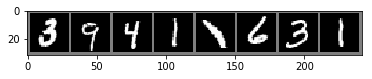

In [98]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next() # .next() 다음것 가져오기
#print(images.shape) # 

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].item() for j in range(8)))

In [89]:
pip freeze

absl-py==0.12.0
astunparse==1.6.3
attrs==19.3.0
backcall==0.2.0
bleach==3.1.5
blinker==1.4
boto==2.49.0
boto3==1.17.18
botocore==1.20.18
cachetools==4.1.0
certifi==2020.12.5
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cryptography==2.9.2
cvxopt==1.2.6
cvxpy==1.0.21
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
deprecation==2.1.0
dill==0.3.1.1
ecos==2.0.7.post1
entrypoints==0.3
fancyimpute==0.5.5
fastcache==1.1.0
flatbuffers==1.12
future==0.18.2
gast==0.3.3
gensim==3.8.0
google-api-core==1.22.2
google-auth==1.14.1
google-auth-oauthlib==0.4.1
google-cloud-core==1.6.0
google-cloud-storage==1.36.1
google-crc32c==1.1.2
google-pasta==0.2.0
google-resumable-media==1.2.0
googleapis-common-protos==1.52.0
graphviz==0.16
grpcio==1.32.0
h5py==2.10.0
idna==2.9
importlib-metadata==1.6.1
intervaltree==3.1.0
ipykernel==5.3.0
ipython==7.15.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.17.0
Jinja2==2.11.2
jmespath==0.10.0
joblib==1.0.1
jsonpickle==2.0.0
jsonschema==3.2.0
jupyter-client==6.1.3
jup

In [90]:
torch.__version__

'1.7.1'